# Chatper 6 - Financial Time Series
시계열 분석

<br></br>
## 1 Pandas 로 데이터 다루기
DataFrame : table data

### 01 Pandas 기초
DataFrame : table data

In [1]:
import pandas as pd
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [2]:
print(df.index)    # the index values
print(df.columns)  # the column names
df.ix['c']         # selection via index

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['numbers'], dtype='object')


numbers    30
Name: c, dtype: int64

In [3]:
# DataFrame.ix[ 인덱스 ]
# selection of multiple indices
df.ix[['a', 'd']]  

,numbers
a,10
d,40


In [4]:
# 인덱스 주소값으로 선택하기
# selection via Index object
df.ix[df.index[1:3]]  

,numbers
b,20
c,30


In [5]:
# 컬럼별 총합을 출력한다 (field가 연산의 기준)
df.sum()  

numbers    100
dtype: int64

In [6]:
# 모든 cell에 일괄함수 적용하기
df.apply(lambda x: x ** 2)  

,numbers
a,100
b,400
c,900
d,1600


In [7]:
# 사칙연산은 lambda 안쓰고도 가능
df ** 2  

,numbers
a,100
b,400
c,900
d,1600


In [8]:
# 새로운 컬럼 생성하기
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [9]:
# 특정 컬럼만 선택
# Series : 1차원 DataFrame
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [10]:
# 새로운 컬럼추가
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [11]:
# 일시적으로 자료 추가하기 : [list]에서 객체추가와 동일
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
          ignore_index=True)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [12]:
# df.append() : row 추가
df = df.append(pd.DataFrame({
    'numbers': 100, 'floats': 5.75,'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [13]:
# 이미 존재하는 index를 기준으로 데이터가 수정
df.join(pd.DataFrame([1, 4, 9, 16, 25],
        index=['a', 'b', 'c', 'd', 'y'], columns=['squares',]))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [14]:
# how='outer' : 기존의 index 보존하고, 새로운 index는 추가
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),  how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [15]:
# 각 column의 평균
df[['numbers', 'squares']].mean()

numbers    40.0
squares    11.0
dtype: float64

In [16]:
# 각 column의 표준편차
df[['numbers', 'squares']].std()

numbers    35.355339
squares     9.669540
dtype: float64

### 02 Datetime Index
시계열 자료 생성하기

In [17]:
# B 	business day frequency
# D 	calendar day frequency
# W 	weekly frequency
# M 	month end frequency
# MS 	month start frequency
# Q 	quarter end frequency
# BQ 	business quarter endfrequency
# QS 	quarter start frequency
# BQS 	business quarter start frequency
# BA 	business year end frequency
# BAS 	business year start frequency
# BH 	business hour frequency
# H 	hourly frequency
# T, min 	minutely frequency

In [18]:
import numpy as np
a = np.random.standard_normal((9, 4))        # index 9, field 4 인 자료생성
a.round(6)                                   # 소숫점 6번쨰 자리서 반올림
df = pd.DataFrame(a)                         # 자료 연결하기
df.columns = [['No1', 'No2', 'No3', 'No4']]  # column 추가 (0,1,2.. 기본 column인 경우)
df

,No1,No2,No3,No4
0,-2.075184,-0.928696,0.605274,-1.953962
1,-0.619472,0.222393,1.280927,1.065473
2,-0.364995,0.845469,0.245118,-0.325406
3,-1.660890,1.004368,-0.289123,1.326188
4,0.227539,-0.160516,0.970383,-0.181575
5,1.945529,0.072697,-1.603321,-1.127556
6,0.426174,1.119220,0.926627,1.136306
7,-1.216878,-0.700899,-0.136523,2.118708
8,0.715418,-0.707700,0.183826,0.617990


In [19]:
# value in column No2 at index position 3 : 특정값 추출
df['No2'][3]  

1.0043678803262532

In [20]:
# Datetime Index 생성하기
dates = pd.date_range('2015-1-1', periods=9, freq='M')
print(dates)
df.index = dates
df

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')


,No1,No2,No3,No4
2015-01-31,-2.075184,-0.928696,0.605274,-1.953962
2015-02-28,-0.619472,0.222393,1.280927,1.065473
2015-03-31,-0.364995,0.845469,0.245118,-0.325406
2015-04-30,-1.660890,1.004368,-0.289123,1.326188
2015-05-31,0.227539,-0.160516,0.970383,-0.181575
2015-06-30,1.945529,0.072697,-1.603321,-1.127556
2015-07-31,0.426174,1.119220,0.926627,1.136306
2015-08-31,-1.216878,-0.700899,-0.136523,2.118708
2015-09-30,0.715418,-0.707700,0.183826,0.617990


In [21]:
# DataFrame 을 array 객체로 변환하기
np.array(df).round(5)

array([[-2.07518, -0.9287 ,  0.60527, -1.95396],
       [-0.61947,  0.22239,  1.28093,  1.06547],
       [-0.36499,  0.84547,  0.24512, -0.32541],
       [-1.66089,  1.00437, -0.28912,  1.32619],
       [ 0.22754, -0.16052,  0.97038, -0.18158],
       [ 1.94553,  0.0727 , -1.60332, -1.12756],
       [ 0.42617,  1.11922,  0.92663,  1.13631],
       [-1.21688, -0.7009 , -0.13652,  2.11871],
       [ 0.71542, -0.7077 ,  0.18383,  0.61799]])

### 03 기초적인 분석
Basic Analytics

In [22]:
print(df.sum())
print(df.mean())
print(df.cumsum())

No1   -2.622760
No2    0.766338
No3    2.183189
No4    2.676166
dtype: float64
No1   -0.291418
No2    0.085149
No3    0.242577
No4    0.297352
dtype: float64
                 No1       No2       No3       No4
2015-01-31 -2.075184 -0.928696  0.605274 -1.953962
2015-02-28 -2.694656 -0.706302  1.886200 -0.888489
2015-03-31 -3.059651  0.139167  2.131318 -1.213895
2015-04-30 -4.720541  1.143535  1.842195  0.112293
2015-05-31 -4.493003  0.983019  2.812579 -0.069282
2015-06-30 -2.547474  1.055716  1.209258 -1.196838
2015-07-31 -2.121300  2.174936  2.135885 -0.060532
2015-08-31 -3.338178  1.474037  1.999363  2.058177
2015-09-30 -2.622760  0.766338  2.183189  2.676166


In [23]:
df.describe() # 일련의 통계요약

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.291418,0.085149,0.242577,0.297352
std,1.266328,0.778304,0.869235,1.298484
min,-2.075184,-0.928696,-1.603321,-1.953962
25%,-1.216878,-0.700899,-0.136523,-0.325406
50%,-0.364995,0.072697,0.245118,0.617990
75%,0.426174,0.845469,0.926627,1.136306
max,1.945529,1.119220,1.280927,2.118708


In [24]:
# Numpy 유니버셜 함수를 DataFrame 객체에 적용
# np.sqrt() : 제곱근 연산
# NaN : 연산에 실패결과로 입력
np.sqrt(df)  

,No1,No2,No3,No4
2015-01-31,NaN,NaN,0.777993,NaN
2015-02-28,NaN,0.471586,1.131780,1.032218
2015-03-31,NaN,0.919494,0.495094,NaN
2015-04-30,NaN,1.002182,NaN,1.151602
2015-05-31,0.477010,NaN,0.985080,NaN
2015-06-30,1.394822,0.269624,NaN,NaN
2015-07-31,0.652820,1.057932,0.962615,1.065977
2015-08-31,NaN,NaN,NaN,1.455578
2015-09-30,0.845824,NaN,0.428750,0.786123


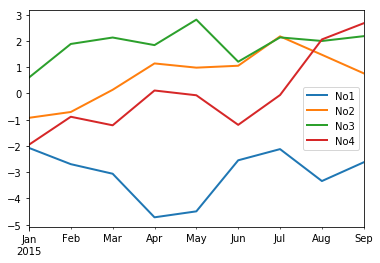

In [25]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

### 04 Series 클래스
Series Class : DataFrame 의 Single Column (1차원 자료형이나 갖출건 다 갖추었음)

In [26]:
print(type(df))
df['No1']

<class 'pandas.core.frame.DataFrame'>


2015-01-31   -2.075184
2015-02-28   -0.619472
2015-03-31   -0.364995
2015-04-30   -1.660890
2015-05-31    0.227539
2015-06-30    1.945529
2015-07-31    0.426174
2015-08-31   -1.216878
2015-09-30    0.715418
Freq: M, Name: No1, dtype: float64

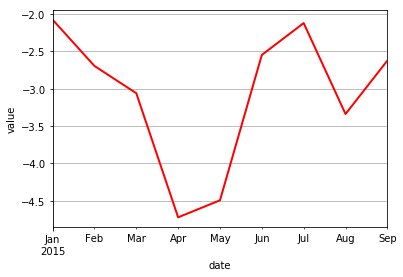

In [27]:
# Line plot of a Series object
# 이걸 불러오면 더 확실한 설정값을 조절 가능
import matplotlib.pyplot as plt  

df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')

### 05 GroupBy 연산
SQL의 그룹지정 및 Excel의 Pivot Table과 유사

In [28]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-2.075184,-0.928696,0.605274,-1.953962,Q1
2015-02-28,-0.619472,0.222393,1.280927,1.065473,Q1
2015-03-31,-0.364995,0.845469,0.245118,-0.325406,Q1
2015-04-30,-1.660890,1.004368,-0.289123,1.326188,Q2
2015-05-31,0.227539,-0.160516,0.970383,-0.181575,Q2
2015-06-30,1.945529,0.072697,-1.603321,-1.127556,Q2
2015-07-31,0.426174,1.119220,0.926627,1.136306,Q3
2015-08-31,-1.216878,-0.700899,-0.136523,2.118708,Q3
2015-09-30,0.715418,-0.707700,0.183826,0.617990,Q3


In [29]:
# Quarter 컬럼을 기준으로 묶는다(특정 index간의 묶음을 지정)
groups = df.groupby('Quarter')

# groups.max()
# groups.mean()
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [30]:
# index를 계층적 형성도 가능하다
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [31]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.619472  0.222393  1.280927  1.065473
        Odd      -1.220090 -0.041613  0.425196 -1.139684
Q2      Even      0.142319  0.538532 -0.946222  0.099316
        Odd       0.227539 -0.160516  0.970383 -0.181575
Q3      Even     -1.216878 -0.700899 -0.136523  2.118708
        Odd       0.570796  0.205760  0.555227  0.877148

<br></br>
## 2 금융자료
Yahoo Finance/ Google Finance

### 01 DAX 자료를 분석하기
^GDAXI : German DAX Index

In [33]:
from pandas_datareader import get_data_yahoo

# German DAX Index를 가져오기
DAX = get_data_yahoo('^GDAXI', '2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4528 entries, 2000-01-03 to 2017-08-30
Data columns (total 6 columns):
Open         4488 non-null float64
High         4488 non-null float64
Low          4488 non-null float64
Close        4488 non-null float64
Adj Close    4488 non-null float64
Volume       4488 non-null float64
dtypes: float64(6)
memory usage: 247.6 KB


In [34]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-24,12196.179688,12254.750000,12169.540039,12180.830078,12180.830078,62852100.0
2017-08-25,12194.730469,12249.440430,12132.500000,12167.940430,12167.940430,57519600.0
2017-08-28,12105.490234,12173.530273,12064.360352,12123.469727,12123.469727,34804100.0
2017-08-29,12031.120117,12032.320313,11868.839844,11945.879883,11945.879883,97873800.0
2017-08-30,12026.450195,12040.820313,11989.610352,12002.469727,12002.469727,57255200.0


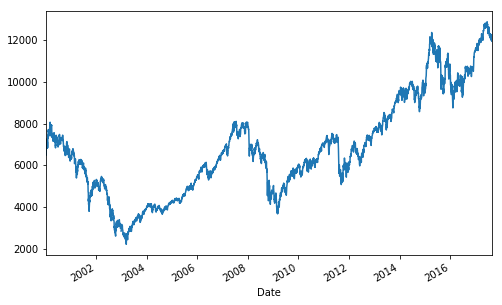

In [35]:
DAX['Close'].plot(figsize=(8,5))

In [36]:
# Close 가격에 기반한 Log 수익률을 계산
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))
DAX[['Close', 'Return', 'Return']].tail()

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 1.81 ms


,Close,Return,Return
Date,,,
2017-08-24,12180.830078,0.000536,0.000536
2017-08-25,12167.940430,-0.001059,-0.001059
2017-08-28,12123.469727,-0.003661,-0.003661
2017-08-29,11945.879883,-0.014757,-0.014757
2017-08-30,12002.469727,0.004726,0.004726


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f778a113ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f778a173a20>], dtype=object)

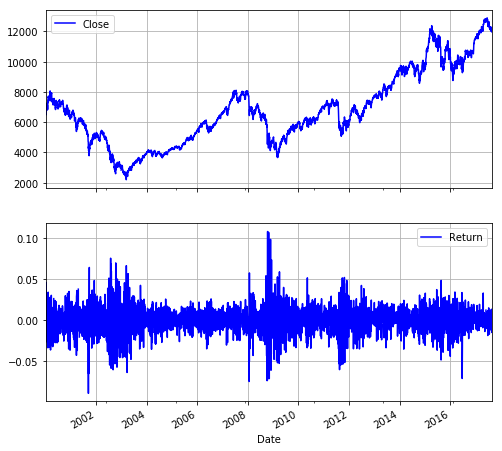

In [37]:
# The DAX index and daily log returns
DAX[['Close', 'Return']].plot(subplots=True, 
                              style='b', figsize=(8, 8), grid=True)

In [38]:
# 불필요한 column 을 삭제하는 방법
# del DAX['Adj Close']
# DAX.drop('Adj Close')

### 02 이동평균선
rolling().mean()/ corr()/ max()

In [39]:
# 이동평균선을 삽입
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,42d,252d
Date,,,,,,,,,
2017-08-24,12196.179688,12254.750000,12169.540039,12180.830078,12180.830078,62852100.0,0.000536,12308.985421,NaN
2017-08-25,12194.730469,12249.440430,12132.500000,12167.940430,12167.940430,57519600.0,-0.001059,12297.572824,NaN
2017-08-28,12105.490234,12173.530273,12064.360352,12123.469727,12123.469727,34804100.0,-0.003661,12290.603283,NaN
2017-08-29,12031.120117,12032.320313,11868.839844,11945.879883,11945.879883,97873800.0,-0.014757,12281.573754,NaN
2017-08-30,12026.450195,12040.820313,11989.610352,12002.469727,12002.469727,57255200.0,0.004726,12270.315662,NaN


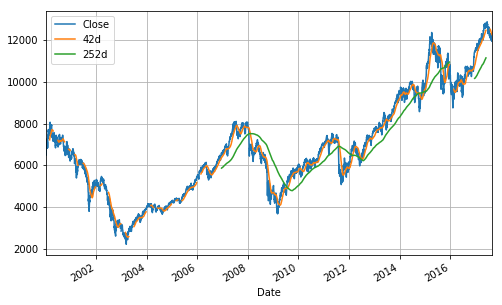

In [40]:
# title: The DAX index and moving averages
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f778a1c23c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7789e7a5c0>], dtype=object)

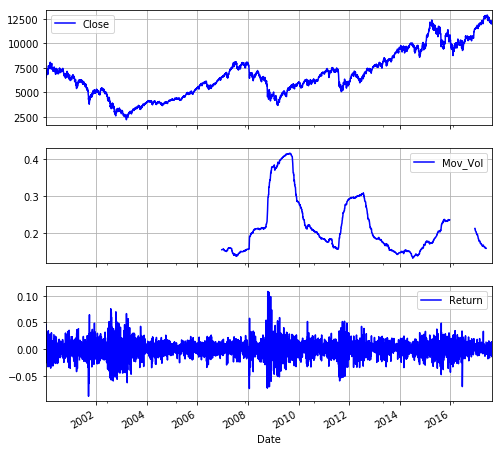

In [41]:
# 연간 이동 변동성 (The DAX index and moving, annualized volatility)
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
DAX[['Close','Mov_Vol','Return']].plot(subplots=True, 
                                       style='b', figsize=(8,8), grid=True)

In [42]:
# 결과
# 레버리지효과의 가설을 검증가능
# 변동성 증가시 지수하락, 변동성 하락시 지수증가

<br></br>
## 3 회귀분석
Regression Analysis

### 01 text 파일 전처리 하기
url text

In [43]:
import pandas as pd
from urllib import request

In [44]:
# MP3등 binary 파일도 다운로드 가능
# mp3_url = 'http://cdn.podbbang.com/data1/kbsvoice/nara2moohyun07.mp3'
# request.urlretrieve(mp3_url, './data/nara2moohyun07.mp3')
# print('done')

In [45]:
# # WEB 데이터를 text 로 저장하기
# es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
# vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
# request.urlretrieve(es_url, './data/es.txt')
# request.urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt  # Windows: use dir

-rw-rw-r-- 1 markbaum 688500  8월 31 11:29 ./data/es.txt
-rw-rw-r-- 1 markbaum 531406  8월 31 13:02 ./data/es50.txt
-rw-rw-r-- 1 markbaum 363485  8월 31 11:30 ./data/vs.txt


In [46]:
# ./data/es.txt 파일 전처리 작업 
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines] # 빈칸 삭제
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [47]:
# 열 마지막 '세미콜론'을 전처리
for line in lines[3883:3890]:
    print(line[41:], end='')

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [48]:
# opens a new file
new_file = open('./data/es50.txt', 'w')
# 셋쨰줄 수정후, 첫 줄에 옮겨적는다
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
# 나머지 줄을 옮겨 적는다
new_file.writelines(lines[4:])
new_file.close()

In [49]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [50]:
# pandas 를 통해서 파일을 불러와도 가능하다
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [51]:
# 해당 컬럼을 삭제한다
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [52]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']

es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';',
                 dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [53]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


### 02 회귀분석을 위한 별도 컬럼을 생성하기
DataFrame/ Join --> to Log

In [54]:
# 1 새로운 텍스트 파일을 연다
# 2 필요없는 헤더를 지운다
# 3 적절한 새로운 해더를 쓴다
# 4 줄 끝의 세미콜론을 삭제하기 위해 보조열 추가
# 5 모든 자료를 새로운 파일에 쓴다

In [55]:
# 회귀분석을 위해, 필요한 column 만 추출해서 data 만들기
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

In [56]:
# 컬럼 추가
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [57]:
# index의 마무리 기간을 지정
data = data[data.index < '2015-12-31']
data.tail()

,EUROSTOXX,VSTOXX
2015-12-23,3286.68,20.2504
2015-12-24,3284.47,NaN
2015-12-28,3256.49,22.4544
2015-12-29,3314.28,21.6067
2015-12-30,3287.98,22.1745


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7789a00240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7788c6d780>], dtype=object)

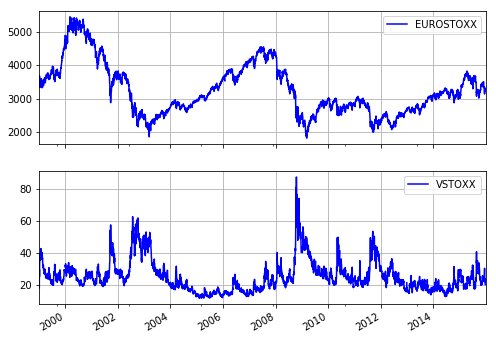

In [58]:
# 유로스톡 50 Index 와 VSTOXX 변동성 지수 시각화
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

,EUROSTOXX,VSTOXX
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
1999-01-11,-0.019593,0.103173


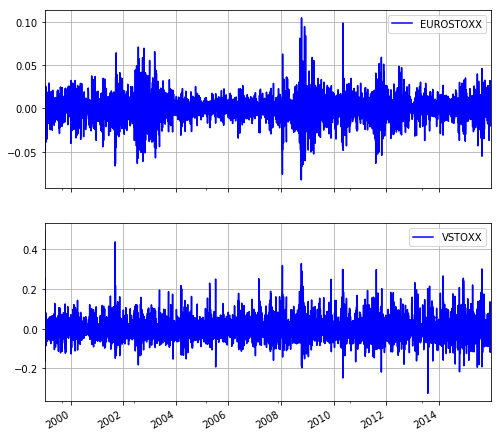

In [59]:
# 두 시계열의 로그 수익률 연산
rets = np.log(data / data.shift(1))
rets.dropna(inplace=True) # 필요없는 부분 삭제
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 8))
rets.head()

### 03 회귀분석 시작
regression analysis

In [60]:
# 상관계수를 계산
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.737094
VSTOXX,-0.737094,1.000000


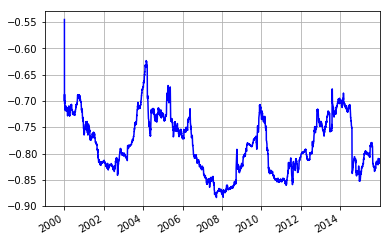

In [61]:
# 일자별 상관계수 변화를 시각화
# 252일 (연) 단위로 상관계수를 매일 계산
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')

In [62]:
import numpy as np

xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values

reg = np.polyfit(x=xdat, y=ydat, deg=1)
reg

array([ -2.83831710e+00,  -2.67365316e-04])

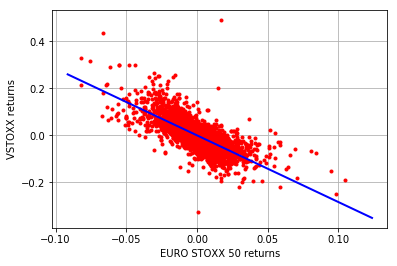

In [63]:
# log 수익률의 Scatter plot과 회귀분석선 
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()                # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2) 
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [64]:
# 회귀식 수식을 계산
# 기울기, 편차, r값 , p value 모두 측정가능
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,np.polyval(reg, x))
print(slope, intercept)

-2.83831710147 -0.000267365316386


### 04 고빈도 자료 분석
High Frequency Data : Tick 데이터

In [65]:
# 필요한 모듈을 불러온다
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [66]:
# 노르웨이 증권거래소에서 'NKE'의 tick 데이터를 불러온다
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [ ]:
# 자료를 불러올 날짜를 특정한다
year = '2017'
month = '08'
days = ['23', '24', '25', '26', '27']

In [ ]:
# 데이터 불러오기
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
# 간결하게 컬럼의 이름을 바꾼다
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
print(NKE.shape, '\n')
NKE.info()

In [ ]:
# 중간 매매가 없는 구간 : 시장이 열리지 않은 시간
NKE['bid'].plot()

In [ ]:
# 데이터 첫날부터 0시 ~ 3시 까지의 매매를 시각화
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2017, 8, 25, 0, 0))
 &  (NKE.index < dt.datetime(2017, 8, 26, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)

In [ ]:
# Tick 데이터를 일정한 시간간격에 따라 resampleing
NKE_resam = NKE.resample(rule='5min').mean()
np.round(NKE_resam.head(), 2)
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)

In [ ]:
# test 임의 함수를 개별 데이터에 적용
# 주가의 움직음을 특정한 레벨에 대해 대칭을 시킨다
def reversal(x):
    return 2 * 95 - x

# Resampled Apple stock tick data with function applied to it
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)